TALLER 5: ANÁLISIS COMPLETO DEL CONJUNTO DE DATOS

El presente taller tiene por objetivo realizar el análisis exploratorio y preparación de los datos, incluyendo al menos un modelo de ML, de un conjunto de datos seleccionado.

El conjunto de datos es el conjunto de datos "Cantidad de usuarios conectados a zonas Wi-Fi" tomado del portal de datos abiertos de Cali.

Se responderá a la siguiente pregunta SAMRT: ¿Es posible predecir el uso de la red WIFI del último trimestre de 2024 de la área urbana de Cali, en la zona con mayor número de conexiones con información de conexiones y uso de la red de los primeros 7 meses del mismo año?

Según la experiencia obtenida en los análissi previos, pareciera que dentro del conjunto de datos hay más de una población. Por tanto, se conduce el análisis del presente trabajo en una zona en particular y así descartar una posible mezcla de poblaciones.

Importación de librerías

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
from numpy import std
from pandas import read_csv
from scipy.stats import shapiro
from scipy.stats import anderson
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from scipy.stats import skew, kurtosis, pearsonr
import statsmodels.api as sm
import locale

Carga del conjunto de datos


In [127]:
path = 'https://datos.cali.gov.co/dataset/3723aafb-4ee2-4c01-a20c-89d791ee77e8/resource/c6f9b4b5-914d-4c58-985d-02d72b815919/download/conexiones-zonas-wifi-cali.csv'
df = pd.read_csv(path, delimiter = ';', encoding='latin-1')
df

,FECHA CONEXIÓN,AREA,NOMBRE ZONA,COMUNA,MODEL,NÚMERO CONEXIONES,USAGE (kB),PORCENTAJE USO
0,1-ene-24,URBANA,001_ZW Parque Ingenio,17,MR76,42,3709424,"424,40%"
1,1-ene-24,URBANA,001_ZW Parque Ingenio,17,MR76,49,2550212,"291,70%"
2,1-ene-24,URBANA,002_ZW Canchas Panamericanas,19,MR76,8,1419251,"162,40%"
3,1-ene-24,URBANA,003_ZW Parque del Perro,19,MR76,31,558191,"63,90%"
4,1-ene-24,URBANA,003_ZW Parque del Perro,19,MR76,26,279273,"31,90%"
...,...,...,...,...,...,...,...,...
13509,30-jun-24,URBANA,054_ZW El Diamante,13,MR76,19,1707901,"366,80%"
13510,30-jun-24,URBANA,055_ZW Polideportivo Petecuy,6,MR76,46,18415,"4,00%"
13511,30-jun-24,URBANA,055_ZW Polideportivo Petecuy,6,MR76,31,4300,"0,90%"
13512,30-jun-24,URBANA,056_ZW Comuna 16,16,MR76,4,35728,"7,70%"


## Filtrado del conjunto de datos para obtener solamente los datos necesarios según pregunta SMART.

Primer filtro por área. Se toma solo los datos del área urbana.

In [129]:
df_ur = df[df['AREA'] == 'URBANA']
df_ur

,FECHA CONEXIÓN,AREA,NOMBRE ZONA,COMUNA,MODEL,NÚMERO CONEXIONES,USAGE (kB),PORCENTAJE USO
0,1-ene-24,URBANA,001_ZW Parque Ingenio,17,MR76,42,3709424,"424,40%"
1,1-ene-24,URBANA,001_ZW Parque Ingenio,17,MR76,49,2550212,"291,70%"
2,1-ene-24,URBANA,002_ZW Canchas Panamericanas,19,MR76,8,1419251,"162,40%"
3,1-ene-24,URBANA,003_ZW Parque del Perro,19,MR76,31,558191,"63,90%"
4,1-ene-24,URBANA,003_ZW Parque del Perro,19,MR76,26,279273,"31,90%"
...,...,...,...,...,...,...,...,...
13509,30-jun-24,URBANA,054_ZW El Diamante,13,MR76,19,1707901,"366,80%"
13510,30-jun-24,URBANA,055_ZW Polideportivo Petecuy,6,MR76,46,18415,"4,00%"
13511,30-jun-24,URBANA,055_ZW Polideportivo Petecuy,6,MR76,31,4300,"0,90%"
13512,30-jun-24,URBANA,056_ZW Comuna 16,16,MR76,4,35728,"7,70%"


Identificamos el área con mayor cantidad de conexiones

Identificamos cuál es la zona con mayor número de conexiones:

In [130]:
df_ur[['NOMBRE ZONA', 'NÚMERO CONEXIONES']].groupby('NOMBRE ZONA').sum('NÚMERO CONEXIONES').sort_values(by='NÚMERO CONEXIONES', ascending=False)

,NÚMERO CONEXIONES
NOMBRE ZONA,
005_ZW Parque Barrio Obrero,53948
036_ZW Parque India Elena,27378
035_ZW Parque Colseguros,26693
021_ZW Parque Alfonso Barberena,26012
006_ZW Parque Vallado,24645
011_ZW Parque Santa Rosa Poblado,22566
003_ZW Parque del Perro,21375
026_ZW Parque La Flora,19601
024_ZW Museo La Tertualia,17384


Se selecciona la zona "005_ZW Parque Barrio Obrero" para continuar con el análisis.

Subconjunto de datos después de identificar la zona de análisis

In [131]:
data = df_ur[df_ur['NOMBRE ZONA'] == '005_ZW Parque Barrio Obrero']
data

,FECHA CONEXIÓN,AREA,NOMBRE ZONA,COMUNA,MODEL,NÚMERO CONEXIONES,USAGE (kB),PORCENTAJE USO
5,1-ene-24,URBANA,005_ZW Parque Barrio Obrero,9,MR76,131,1791964,"205,00%"
6,1-ene-24,URBANA,005_ZW Parque Barrio Obrero,9,MR76,99,631069,"72,20%"
85,2-ene-24,URBANA,005_ZW Parque Barrio Obrero,9,MR76,128,202038,"24,00%"
86,2-ene-24,URBANA,005_ZW Parque Barrio Obrero,9,MR76,97,69675,"8,30%"
165,3-ene-24,URBANA,005_ZW Parque Barrio Obrero,9,MR76,113,8741023,"721,30%"
...,...,...,...,...,...,...,...,...
13303,28-jun-24,URBANA,005_ZW Parque Barrio Obrero,9,MR76,192,19987,"3,40%"
13375,29-jun-24,URBANA,005_ZW Parque Barrio Obrero,9,MR76,247,16870,"2,90%"
13376,29-jun-24,URBANA,005_ZW Parque Barrio Obrero,9,MR76,232,17870,"3,00%"
13448,30-jun-24,URBANA,005_ZW Parque Barrio Obrero,9,MR76,166,1914529,"411,20%"


Eliminamos las columnas que no serán parte del análisis

In [76]:
data = data.drop(columns=['AREA', 'NOMBRE ZONA', 'COMUNA', 'MODEL', 'PORCENTAJE USO'])
data

,FECHA CONEXIÓN,NÚMERO CONEXIONES,USAGE (kB)
5,1-ene-24,131,1791964
6,1-ene-24,99,631069
85,2-ene-24,128,202038
86,2-ene-24,97,69675
165,3-ene-24,113,8741023
...,...,...,...
13303,28-jun-24,192,19987
13375,29-jun-24,247,16870
13376,29-jun-24,232,17870
13448,30-jun-24,166,1914529


Aplicamos cambio de unidad a la columna 'USAGE (Kb)' para exporesarla en GB.

In [132]:
data['USAGE (kB)'] = data['USAGE (kB)'].astype(float)
data['USAGE (GB)'] = data['USAGE (kB)'] / 1024 / 1024
data = data.drop(columns=['USAGE (kB)'])

<ipython-input-132-716f15eb7b14>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['USAGE (kB)'] = data['USAGE (kB)'].astype(float)
<ipython-input-132-716f15eb7b14>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['USAGE (GB)'] = data['USAGE (kB)'] / 1024 / 1024


In [133]:
data

,FECHA CONEXIÓN,AREA,NOMBRE ZONA,COMUNA,MODEL,NÚMERO CONEXIONES,PORCENTAJE USO,USAGE (GB)
5,1-ene-24,URBANA,005_ZW Parque Barrio Obrero,9,MR76,131,"205,00%",1.708950
6,1-ene-24,URBANA,005_ZW Parque Barrio Obrero,9,MR76,99,"72,20%",0.601834
85,2-ene-24,URBANA,005_ZW Parque Barrio Obrero,9,MR76,128,"24,00%",0.192678
86,2-ene-24,URBANA,005_ZW Parque Barrio Obrero,9,MR76,97,"8,30%",0.066447
165,3-ene-24,URBANA,005_ZW Parque Barrio Obrero,9,MR76,113,"721,30%",8.336089
...,...,...,...,...,...,...,...,...
13303,28-jun-24,URBANA,005_ZW Parque Barrio Obrero,9,MR76,192,"3,40%",0.019061
13375,29-jun-24,URBANA,005_ZW Parque Barrio Obrero,9,MR76,247,"2,90%",0.016088
13376,29-jun-24,URBANA,005_ZW Parque Barrio Obrero,9,MR76,232,"3,00%",0.017042
13448,30-jun-24,URBANA,005_ZW Parque Barrio Obrero,9,MR76,166,"411,20%",1.825837


In [136]:
data.replace({'ene': 'jan', 'abr': 'apr', 'ago': 'aug', 'dic': 'dec'}, regex=True, inplace=True)
data

,FECHA CONEXIÓN,AREA,NOMBRE ZONA,COMUNA,MODEL,NÚMERO CONEXIONES,PORCENTAJE USO,USAGE (GB)
5,1-jan-24,URBANA,005_ZW Parque Barrio Obrero,9,MR76,131,"205,00%",1.708950
6,1-jan-24,URBANA,005_ZW Parque Barrio Obrero,9,MR76,99,"72,20%",0.601834
85,2-jan-24,URBANA,005_ZW Parque Barrio Obrero,9,MR76,128,"24,00%",0.192678
86,2-jan-24,URBANA,005_ZW Parque Barrio Obrero,9,MR76,97,"8,30%",0.066447
165,3-jan-24,URBANA,005_ZW Parque Barrio Obrero,9,MR76,113,"721,30%",8.336089
...,...,...,...,...,...,...,...,...
13303,28-jun-24,URBANA,005_ZW Parque Barrio Obrero,9,MR76,192,"3,40%",0.019061
13375,29-jun-24,URBANA,005_ZW Parque Barrio Obrero,9,MR76,247,"2,90%",0.016088
13376,29-jun-24,URBANA,005_ZW Parque Barrio Obrero,9,MR76,232,"3,00%",0.017042
13448,30-jun-24,URBANA,005_ZW Parque Barrio Obrero,9,MR76,166,"411,20%",1.825837


## Análisis univariado

Función para agregar simetría y curtosis a la tabla descriptiva

In [29]:
def tabla_descriptivas(columnas):
    tabla_descriptivas=pd.DataFrame(columnas.describe())
    tabla_descriptivas.loc['coef. variation']=columnas.std()/columnas.mean()
    tabla_descriptivas.loc['skew']=skew(columnas)
    tabla_descriptivas.loc['kurtosis']=kurtosis(columnas)
    return tabla_descriptivas

In [64]:
tabla_descriptivas(data['NÚMERO CONEXIONES'])

,NÚMERO CONEXIONES
count,364.000000
mean,148.208791
std,30.599705
min,71.000000
25%,128.750000
50%,145.000000
75%,167.000000
max,271.000000
coef. variation,0.206463
skew,0.660574


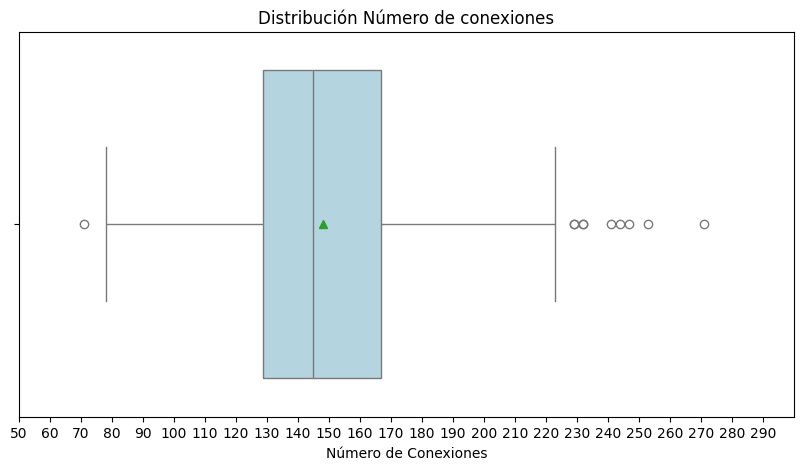

In [44]:
plt.figure(figsize=(10,5))
boxplot_ncone=sns.boxplot(x=data['NÚMERO CONEXIONES'],color="lightblue",showmeans=True)
boxplot_ncone.set_xlabel('Número de Conexiones')
boxplot_ncone.set_xlim(50, 300)
boxplot_ncone.set_xticks(range(50, 300, 10))
boxplot_ncone.set_title('Distribución Número de conexiones')
plt.show()

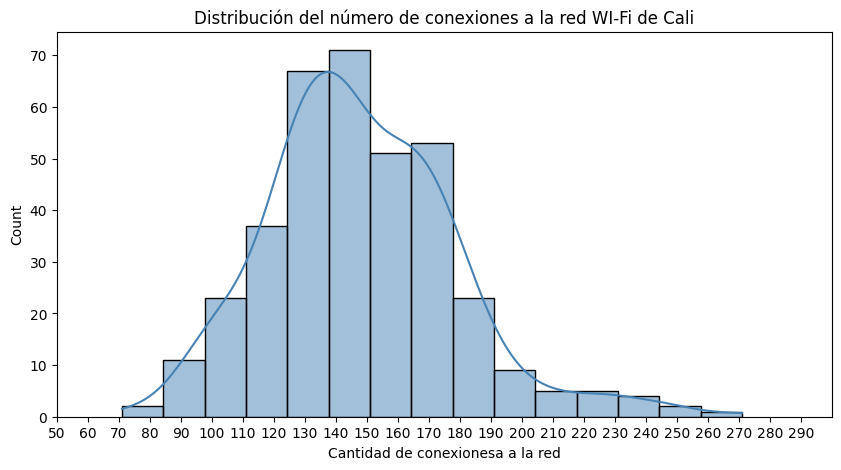

In [46]:
plt.figure(figsize=(10,5))
hist_ncone=sns.histplot(x=data['NÚMERO CONEXIONES'],kde=True,color="steelblue",bins = 15)
hist_ncone.set_xlabel('Cantidad de conexionesa a la red')
hist_ncone.set_xlim(50, 300)
hist_ncone.set_xticks(range(50, 300, 10))
hist_ncone.set_title('Distribución del número de conexiones a la red WI-Fi de Cali')
plt.show()

La variable 'NÚMERO CONEXIONES' (en adelante conexiones), tiene una leve asimetría con sesgo positivo y forma plecticúrtica (achatada). Teniendo el cuenta el gráfico de bigotes, se deben tratar los outliers.

In [65]:
tabla_descriptivas(data['USAGE (GB)'])

,USAGE (GB)
count,364.000000
mean,2.734415
std,3.163735
min,0.004234
25%,0.065243
50%,1.701601
75%,4.544364
max,18.016323
coef. variation,1.157006
skew,1.564738


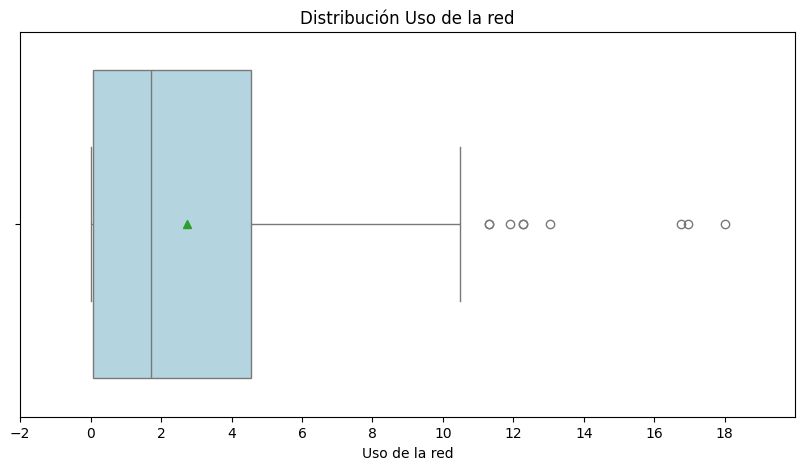

In [49]:
plt.figure(figsize=(10,5))
boxplot_ncone=sns.boxplot(x=data['USAGE (GB)'],color="lightblue",showmeans=True)
boxplot_ncone.set_xlabel('Uso de la red')
boxplot_ncone.set_xlim(-2, 20)
boxplot_ncone.set_xticks(range(-2, 20, 2))
boxplot_ncone.set_title('Distribución Uso de la red')
plt.show()

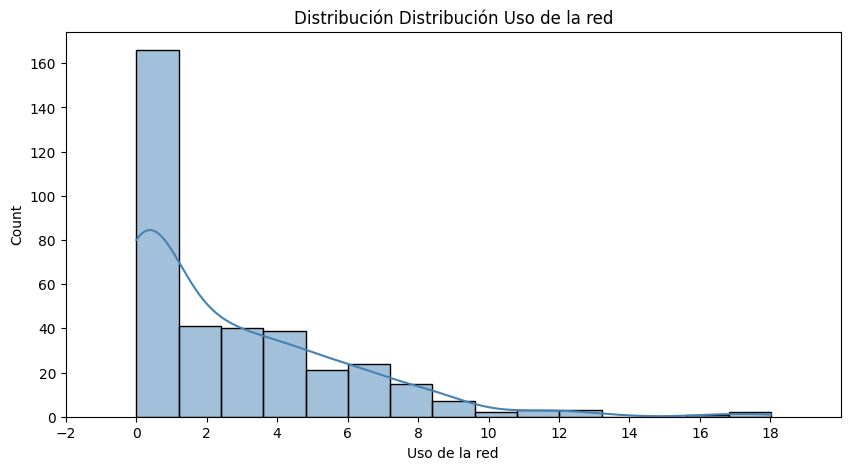

In [50]:
plt.figure(figsize=(10,5))
hist_ncone=sns.histplot(x=data['USAGE (GB)'],kde=True,color="steelblue",bins = 15)
hist_ncone.set_xlabel('Uso de la red')
hist_ncone.set_xlim(-2, 20)
hist_ncone.set_xticks(range(-2, 20, 2))
hist_ncone.set_title('Distribución Distribución Uso de la red')
plt.show()

Por otra parte, la variable 'USAGE (GB)' (en adelante uso) es asimétrica con sesgo positivo y forma mesocúrtica (K aprox. 3). Según el gráfico de bigotes, es necesario tratar los outliers.

## Tratamiento de outliers: imputación de datos

Función de imputación

In [53]:
def impute_outliers_IQR(data):
   q1=data.quantile(0.25)
   q3=data.quantile(0.75)
   IQR=q3-q1
   upper = data[~(data>(q3+1.5*IQR))].max()
   lower = data[~(data<(q1-1.5*IQR))].min()

   data = np.where(data > upper, # donde sea mayor
       data.mean(),             # colocamos la media
       np.where(              # en otros caso:
           data < lower,        # Cuando sea menor a lower
           data.mean(),         # colocamos la media
           data                 # el resto de las veces dejamos el valor como estaba
           )
       )
   return data

Imputación de datos



In [83]:
data['NÚMERO CONEXIONES'] = impute_outliers_IQR(data['NÚMERO CONEXIONES'])
data['USAGE (GB)'] = impute_outliers_IQR(data['USAGE (GB)'])
data.describe()

,NÚMERO CONEXIONES,USAGE (GB)
count,364.000000,364.000000
mean,146.101890,2.461709
std,26.327771,2.599954
min,78.000000,0.004234
25%,129.000000,0.065243
50%,145.000000,1.701601
75%,166.000000,4.182847
max,223.000000,10.497751


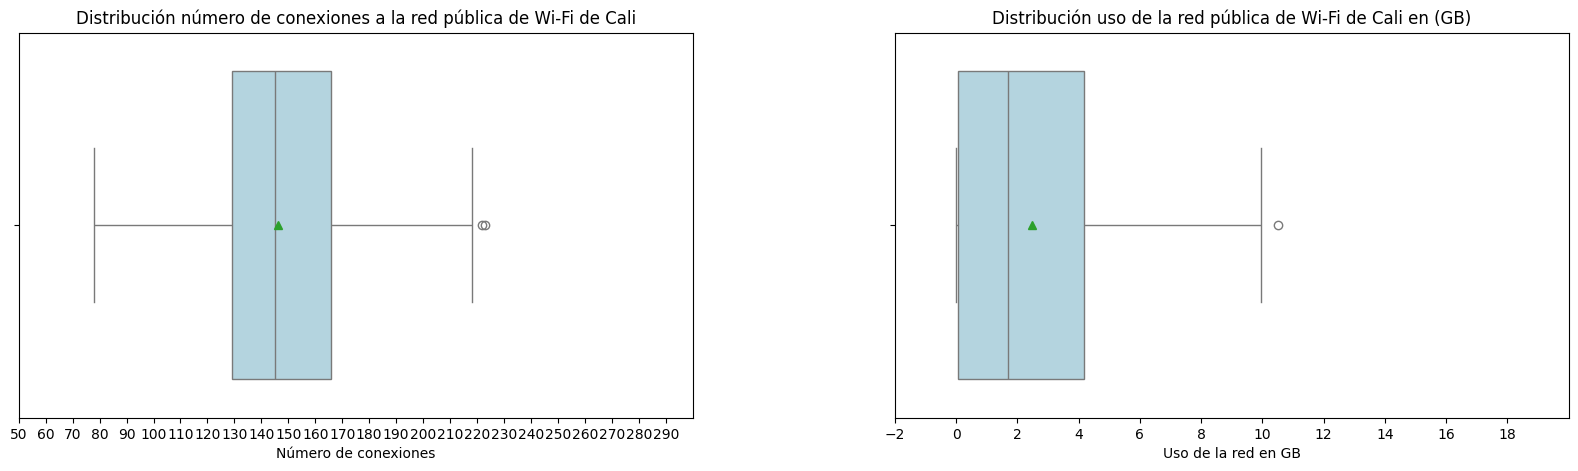

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [71]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(20, 5)
fig.subplots_adjust(wspace=0.3)

plt.figure(figsize=(10,5))
boxplot_usage=sns.boxplot(x=data['NÚMERO CONEXIONES'],color="lightblue",showmeans=True, ax=axs[0])
boxplot_usage.set_xlabel('Número de conexiones')
boxplot_usage.set_xlim(50, 300)
boxplot_usage.set_xticks(range(50, 300, 10))
boxplot_usage.set_title('Distribución número de conexiones a la red pública de Wi-Fi de Cali')

plt.figure(figsize=(10,5))
boxplot_usage=sns.boxplot(x=data['USAGE (GB)'],color="lightblue",showmeans=True, ax=axs[1])
boxplot_usage.set_xlabel('Uso de la red en GB')
boxplot_usage.set_xlim(-2, 20)
boxplot_usage.set_xticks(range(-2, 20, 2))
boxplot_usage.set_title('Distribución uso de la red pública de Wi-Fi de Cali en (GB)')


plt.show()

Escalado de los datos para comparación

In [84]:
scaler = StandardScaler()
scaler.fit(data[['NÚMERO CONEXIONES', 'USAGE (GB)']])
data_scaled = scaler.transform(data[['NÚMERO CONEXIONES', 'USAGE (GB)']])
data_scaled = pd.DataFrame(data_scaled, columns=['NÚMERO CONEXIONES', 'USAGE (GB)'])
data_scaled

,NÚMERO CONEXIONES,USAGE (GB)
0,-0.574400,-0.289926
1,-1.791520,-0.716334
2,-0.688505,-0.873921
3,-1.867590,-0.922539
4,-1.259030,2.262527
...,...,...
359,1.745734,-0.940790
360,0.080136,-0.941935
361,0.080136,-0.941567
362,0.756824,-0.244907


In [94]:
data_scaled.describe()

,NÚMERO CONEXIONES,USAGE (GB)
count,3.640000e+02,3.640000e+02
mean,3.416071e-16,7.808162e-17
std,1.001376e+00,1.001376e+00
min,-2.590255e+00,-9.465004e-01
25%,-6.504702e-01,-9.230029e-01
50%,-4.191037e-02,-2.927568e-01
75%,7.568244e-01,6.628993e-01
max,2.924819e+00,3.095095e+00


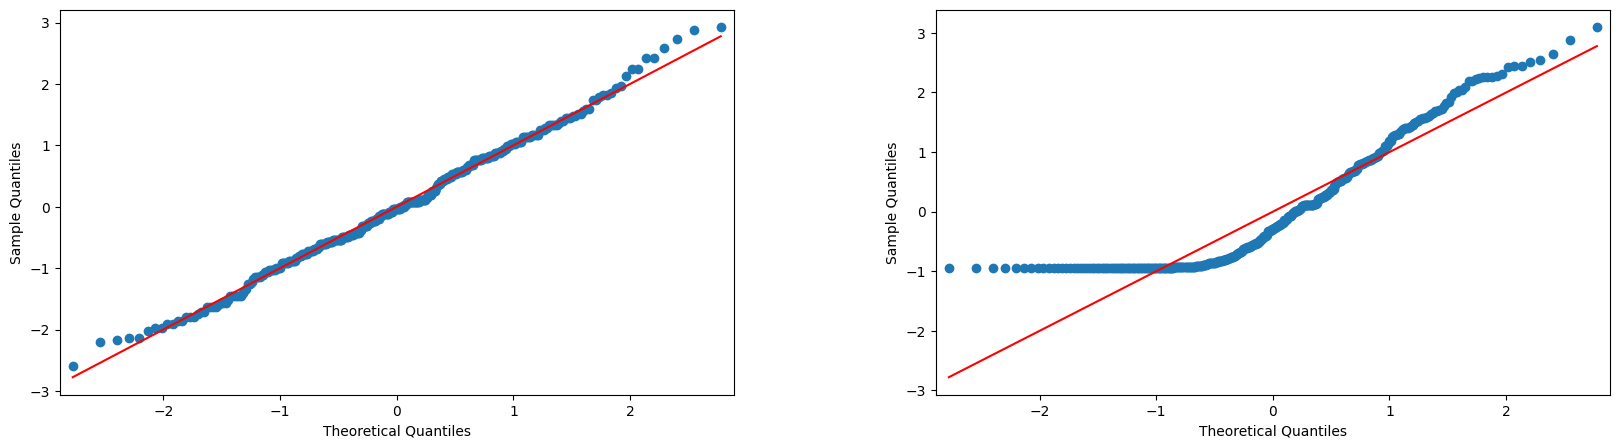

In [95]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(20, 5)
fig.subplots_adjust(wspace=0.3)

ax1=qqplot(data_scaled["NÚMERO CONEXIONES"], line='s',ax=axs[0])
ax2=qqplot(data_scaled["USAGE (GB)"], line='s',ax=axs[1])
plt.show()

In [96]:
print("Número de conexiones")
Estad,vp = shapiro(data_scaled["NÚMERO CONEXIONES"])
print(f'Estadístico SW= {Estad}, Valor-p= {vp}')
Estad,vc,sig=anderson(data_scaled["NÚMERO CONEXIONES"])
print(f'Estadístico AD= {Estad}, Valor crítico (sign. 5%)= {vc[2]}')

print('')

print("Uso de la red (GB)")
Estad,vp = shapiro(data_scaled["USAGE (GB)"])
print(f'Estadístico SW= {Estad}, Valor-p= {vp}')
Estad,vc,sig=anderson(data_scaled["USAGE (GB)"])
print(f'Estadístico AD= {Estad}, Valor crítico (sign. 5%)= {vc[2]}')

print('')

Número de conexiones
Estadístico SW= 0.9948017433742843, Valor-p= 0.2580530953731986
Estadístico AD= 0.4666222700475373, Valor crítico (sign. 5%)= 0.779

Uso de la red (GB)
Estadístico SW= 0.8604172145988582, Valor-p= 1.5305964658455394e-17
Estadístico AD= 16.976177131128566, Valor crítico (sign. 5%)= 0.779



No es posible llegar a una forma normal en la distribución de la variable uso incluso después del escalado. Se considera que el problema principal es que la forma de análisis está siendo iuncorrecta dado que no se está considerando el tiempo. Por tanto, se procede a hacer un análisis de serie de tiempo.

## ACERCAMIENTO A LAS SERIES DE TIEMPO EN LAS VARIABLES SELECCIONADAS

Serie de tiempo para la variable conexiones


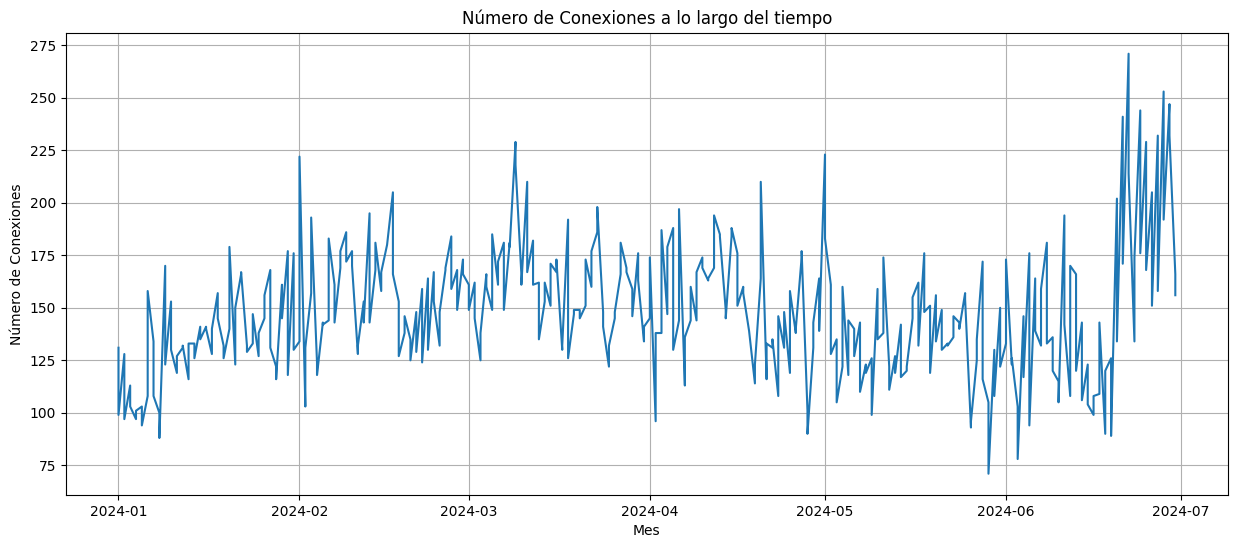

In [140]:
data['FECHA CONEXIÓN'] = pd.to_datetime(data['FECHA CONEXIÓN'], format='%d-%b-%y')

data.sort_values(by='FECHA CONEXIÓN', inplace=True)

plt.figure(figsize=(15, 6))
plt.plot(data['FECHA CONEXIÓN'], data['NÚMERO CONEXIONES'])
plt.xlabel('Mes')
plt.ylabel('Número de Conexiones')
plt.title('Número de Conexiones a lo largo del tiempo')
plt.grid(True)
plt.show()


Descomposición de la serie de tiempo para ubicar estacionalidad o no estacionalidad

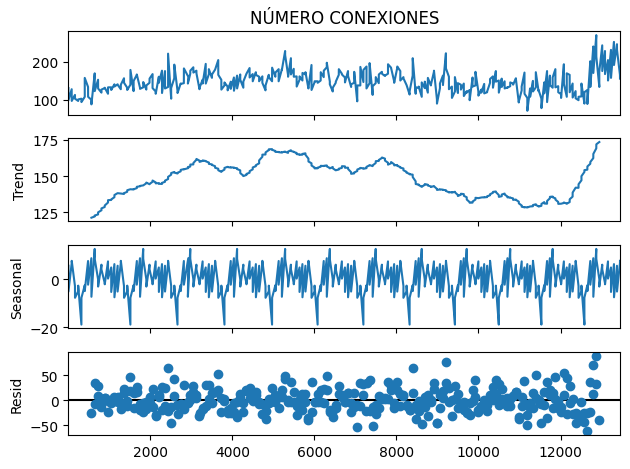

In [142]:
descomposicion = sm.tsa.seasonal_decompose(data['NÚMERO CONEXIONES'],
                                                  model='additive', period=30)
fig = descomposicion.plot()


Serie de tiempo para la variable uso

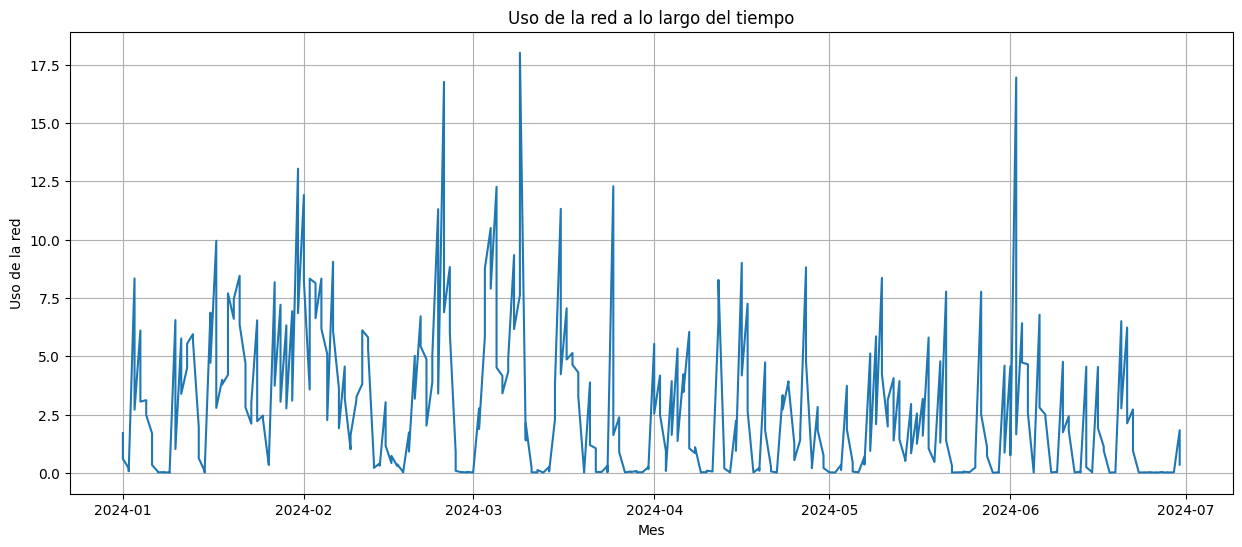

In [145]:
data['FECHA CONEXIÓN'] = pd.to_datetime(data['FECHA CONEXIÓN'], format='%d-%b-%y')

data.sort_values(by='FECHA CONEXIÓN', inplace=True)

plt.figure(figsize=(15, 6))
plt.plot(data['FECHA CONEXIÓN'], data['USAGE (GB)'])
plt.xlabel('Mes')
plt.ylabel('Uso de la red')
plt.title('Uso de la red a lo largo del tiempo')
plt.grid(True)
plt.show()

Descomposición de la serie de tiempo para ubicar estacionalidad o no estacionalidad

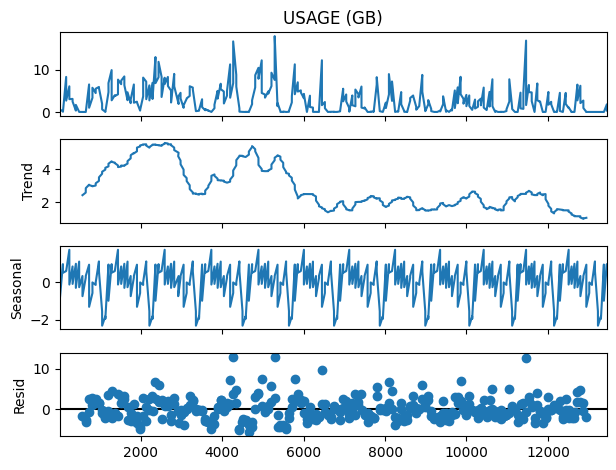

In [144]:
descomposicion = sm.tsa.seasonal_decompose(data['USAGE (GB)'],
                                                  model='additive', period=30)
fig = descomposicion.plot()


Después de buscar modelos predictivos de series de tiempo, se concluye que en este momento no se tiene conocimiento suficiente para desplegar una solución predictiva con dichos modelos.

## Conclusión

Después de filtrar los datos para examinar una zona específica, se conlcuye que la forma de los datos tiene mucho que ver con la dependencia en el tiempo de los datos. Esto se concluye luego de que se explorara univariadamente el conjunto de datos propuestos. Se imputaran datos y se escalaran. no fue posible conseguir que los datos fueran aptos para efectuar una reghresión linear. A continuación se comenzó un análñisis de serie de tiempo que incluyeron una descomposición de los datos su tendencia, estacionalidad y componente residual. Pese a encontrar modelos predictivos para este tipo de análisis, no se condujo ninguno dado que excede por mucho el alcance del curso.

Se dará continuidad en el futuro a la pregunta SMART cuando en un futuro se posea el conocmiento para ejecutar dichos análisis.